In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
iris_data = pd.read_csv('IRIS.csv')
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
iris_data.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Encode the target variable (species)
label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['species'])

In [8]:
# Split the data into features and target
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species_encoded']


In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
model.score(X_test, y_test)*100

88.88888888888889

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate the model
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.78      0.93      0.85        15
 Iris-virginica       0.92      0.73      0.81        15

       accuracy                           0.89        45
      macro avg       0.90      0.89      0.89        45
   weighted avg       0.90      0.89      0.89        45



In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

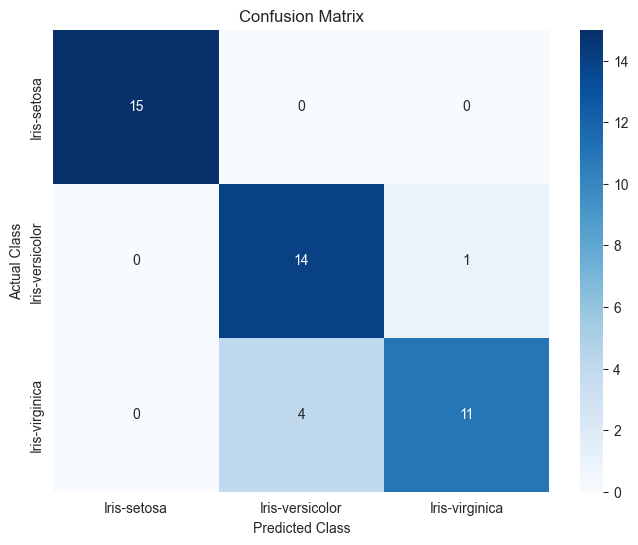

In [15]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()


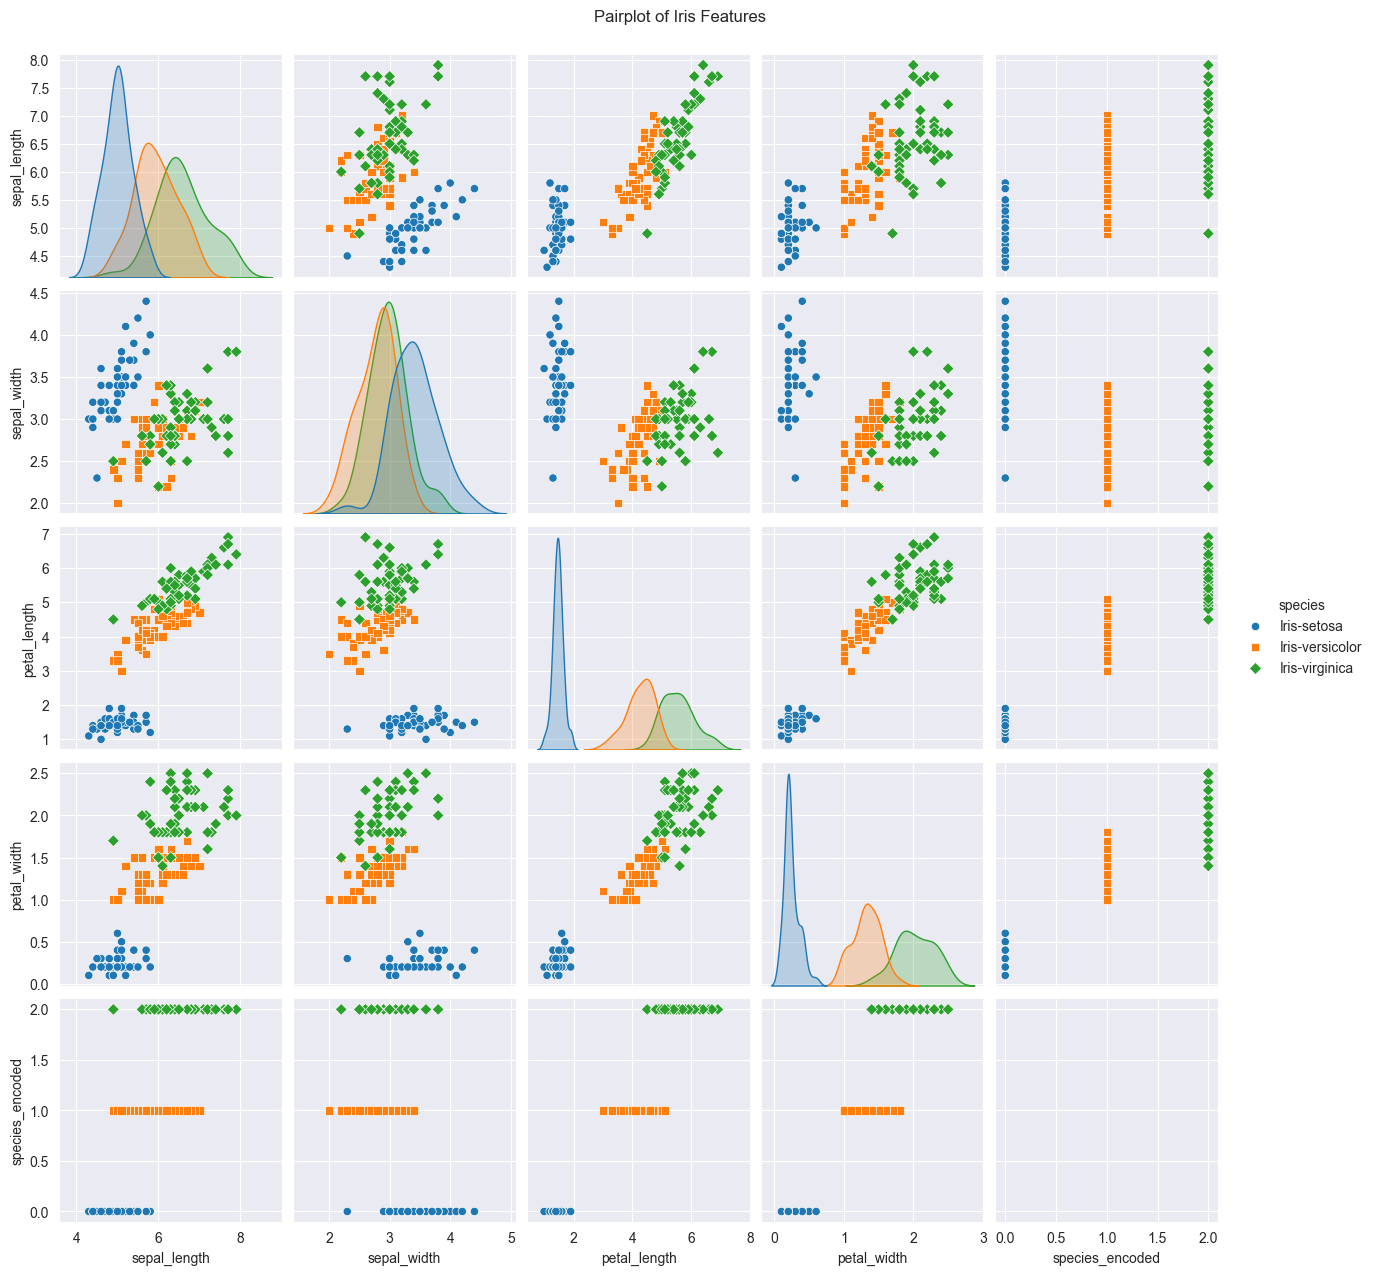

In [16]:
# Pairplot of the features colored by species
sns.pairplot(iris_data, hue="species", markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


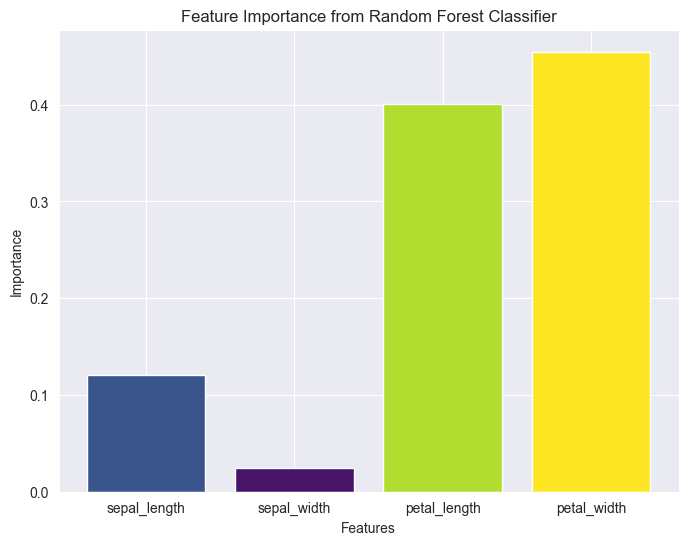

In [17]:
# Feature Importance Plot
feature_importances = model.feature_importances_
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Feature Importance Plot with matplotlib color
#plotting
plt.figure(figsize=(8, 6))
plt.bar(features, feature_importances, color=plt.cm.viridis(feature_importances / max(feature_importances)))
plt.title("Feature Importance from Random Forest Classifier")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()